In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# carregamento da base de dados

incendios_df = pd.read_csv('/content/drive/MyDrive/PROJETOS EDA/amazon.csv', encoding='latin-1', parse_dates= ['date']) # argumento parse para colocar o tipo da coluna para datetime
incendios_df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
incendios_df.shape

(6454, 5)

In [ ]:
incendios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [ ]:
#verificar valores nulos
incendios_df.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


In [ ]:
#verificar valores duplicados
incendios_df.duplicated().sum()

32

In [ ]:
#eliminar duplicatas
incendios_df = incendios_df.drop_duplicates()

In [ ]:
incendios_df.shape

(6422, 5)

In [ ]:
incendios_df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


* Em que mês houve a maior ocorrência de incêndios

In [ ]:
num_incendios_mes = incendios_df.groupby('month')['number'].sum().reset_index()
num_incendios_mes = num_incendios_mes.sort_values(by = 'number', ascending= False)
print(num_incendios_mes)

        month     number
5       Julho  92319.113
10    Outubro  88681.579
1      Agosto  88050.435
9    Novembro  85508.054
11   Setembro  58578.305
2    Dezembro  57535.480
6       Junho  55997.675
4     Janeiro  47681.844
7        Maio  34725.363
3   Fevereiro  30839.050
8       Março  30709.405
0       Abril  28184.770


<ipython-input-50-e98fb4d681fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'month', y = 'number', data = num_incendios_mes, palette = 'Spectral')


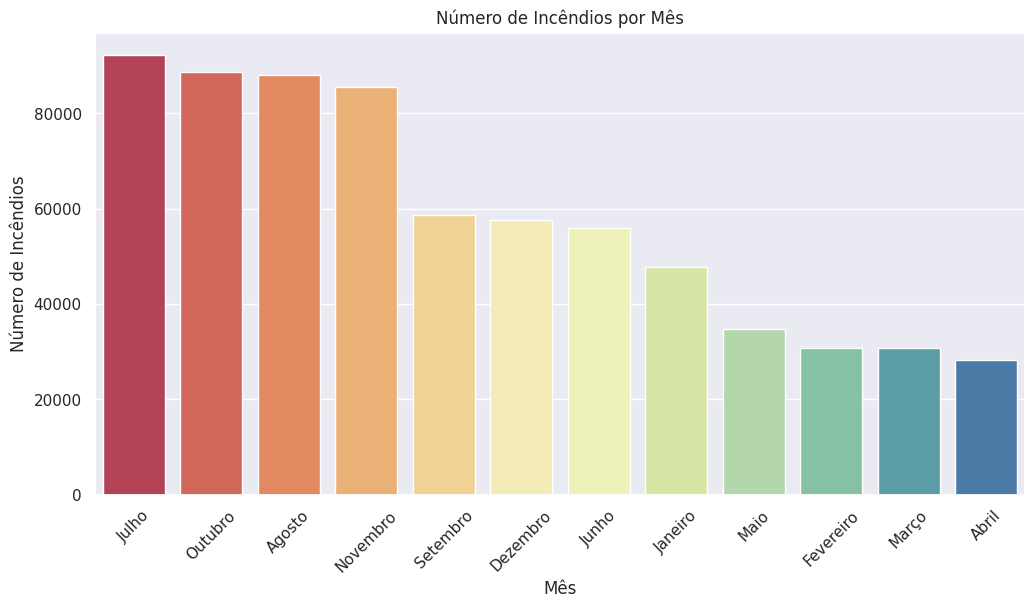

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style="darkgrid")
sns.barplot(x = 'month', y = 'number', data = num_incendios_mes, palette = 'Spectral')
plt.title('Número de Incêndios por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45)
plt.show()

* Qual ano reportou o maior número de ocorrência de incêndios?

In [ ]:
num_incendios_ano = incendios_df.groupby('year')['number'].sum().reset_index()
num_incendios_ano = num_incendios_ano.sort_values(by= 'number', ascending = False)
print(num_incendios_ano)

    year     number
5   2003  42760.674
18  2016  42212.229
17  2015  41208.292
14  2012  40084.860
16  2014  39621.183
11  2009  39116.178
6   2004  38450.163
4   2002  37390.600
12  2010  37037.449
19  2017  36619.624
15  2013  35137.118
7   2005  35004.965
13  2011  34633.545
8   2006  33824.161
9   2007  33028.413
10  2008  29378.964
3   2001  29054.612
2   2000  27351.251
1   1999  26882.821
0   1998  20013.971


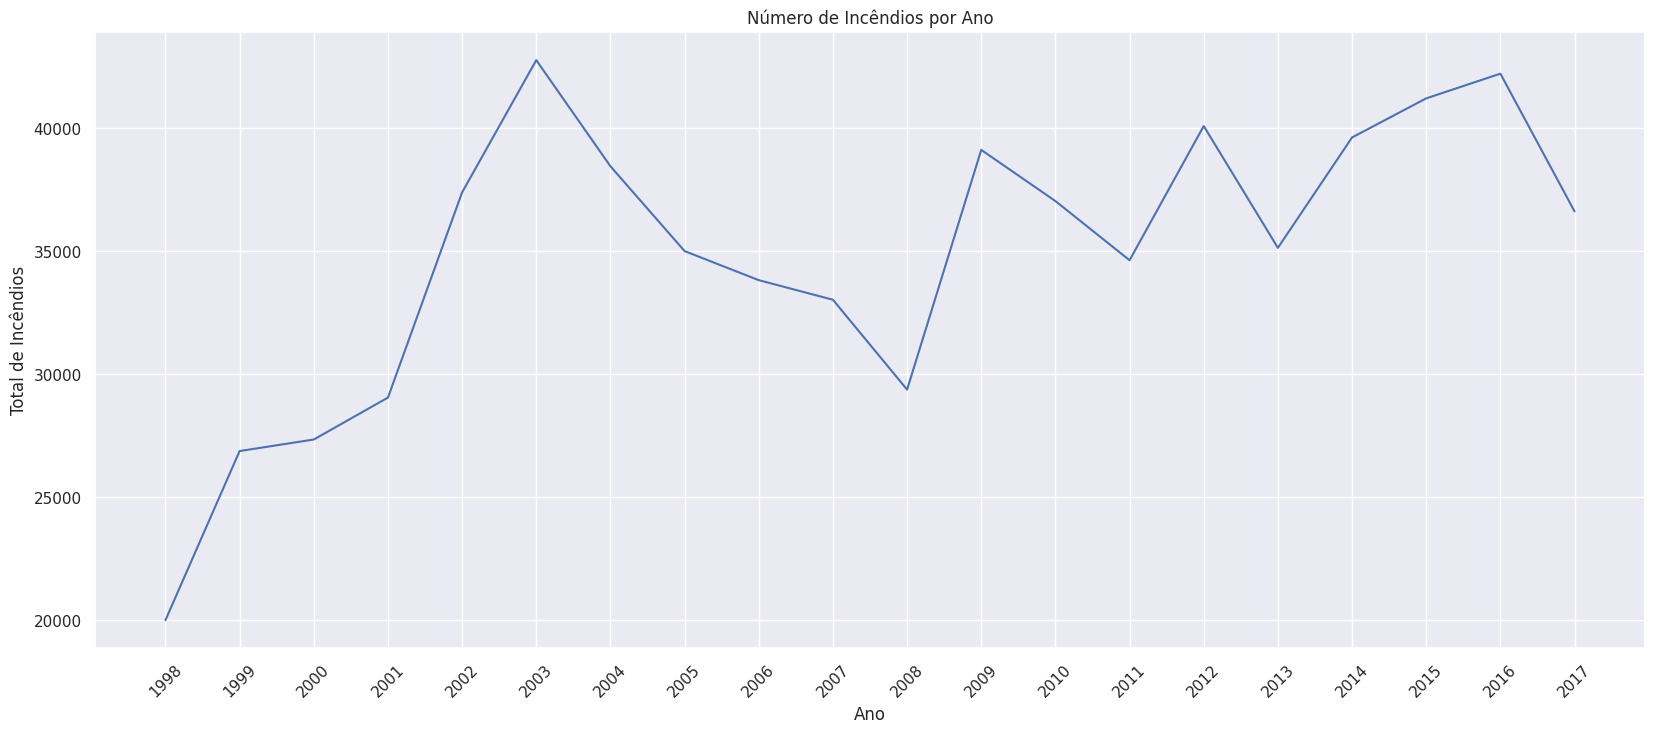

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,8))
sns.lineplot(x="year", y="number", data= num_incendios_ano)
plt.title('Número de Incêndios por Ano')
plt.xticks(num_incendios_ano['year'])
plt.xlabel('Ano')
plt.ylabel('Total de Incêndios')
plt.xticks(rotation=45)
plt.show()

* Qual o estado com maior número de ocorrência de incêndios?


In [ ]:
num_incendios_estados = incendios_df.groupby('state')['number'].sum().reset_index()
num_incendios_estados = num_incendios_estados.sort_values(by='number', ascending = False)
print(num_incendios_estados)

               state     number
10       Mato Grosso  96246.028
12           Paraiba  52426.918
20         Sao Paulo  51121.198
16               Rio  45094.865
4              Bahia  44746.226
15              Piau  37803.747
8              Goias  37695.520
11      Minas Gerais  37475.258
22         Tocantins  33707.885
3           Amazonas  30650.129
5              Ceara  30428.063
9           Maranhao  25129.131
13              Pará  24512.144
14        Pernambuco  24498.000
18           Roraima  24385.074
19    Santa Catarina  24359.852
2              Amapa  21831.576
17          Rondonia  20285.429
0               Acre  18464.030
7     Espirito Santo   6546.000
1            Alagoas   4606.000
6   Distrito Federal   3561.000
21           Sergipe   3237.000


<ipython-input-61-3a75b203d036>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y = 'number', data = num_incendios_estados, palette = 'Spectral')


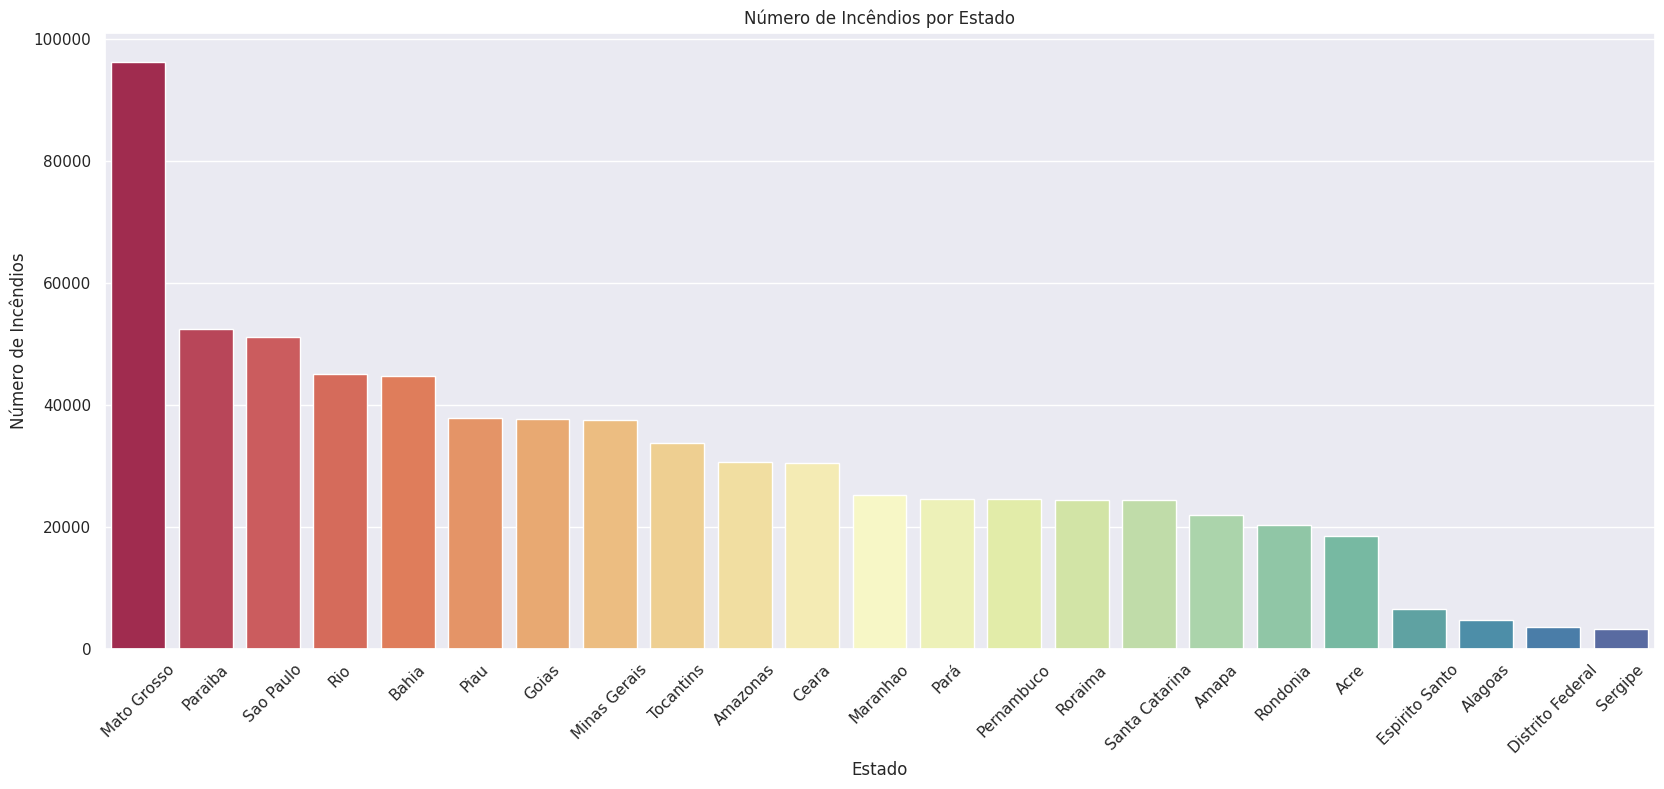

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
sns.barplot(x = 'state', y = 'number', data = num_incendios_estados, palette = 'Spectral')
plt.title('Número de Incêndios por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45)
plt.show()

* Média de incêndios por estado

In [ ]:
media_incendios_estados = incendios_df.groupby('state')['number'].mean().reset_index()
media_incendios_estados = media_incendios_estados.sort_values(by='number', ascending = False)
print(media_incendios_estados)

               state      number
20         Sao Paulo  213.896226
10       Mato Grosso  203.479975
4              Bahia  187.222703
15              Piau  158.174674
8              Goias  157.721841
11      Minas Gerais  156.800243
22         Tocantins  141.037176
3           Amazonas  128.243218
5              Ceara  127.314071
12           Paraiba  111.073979
9           Maranhao  105.142808
13              Pará  102.561272
14        Pernambuco  102.502092
18           Roraima  102.029598
19    Santa Catarina  101.924067
2              Amapa   91.345506
17          Rondonia   84.876272
0               Acre   77.255356
16               Rio   64.698515
7     Espirito Santo   27.389121
1            Alagoas   19.271967
6   Distrito Federal   14.899582
21           Sergipe   13.543933


<ipython-input-74-57aa17b88ce9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y = 'number', data = media_incendios_estados, palette = 'Spectral')


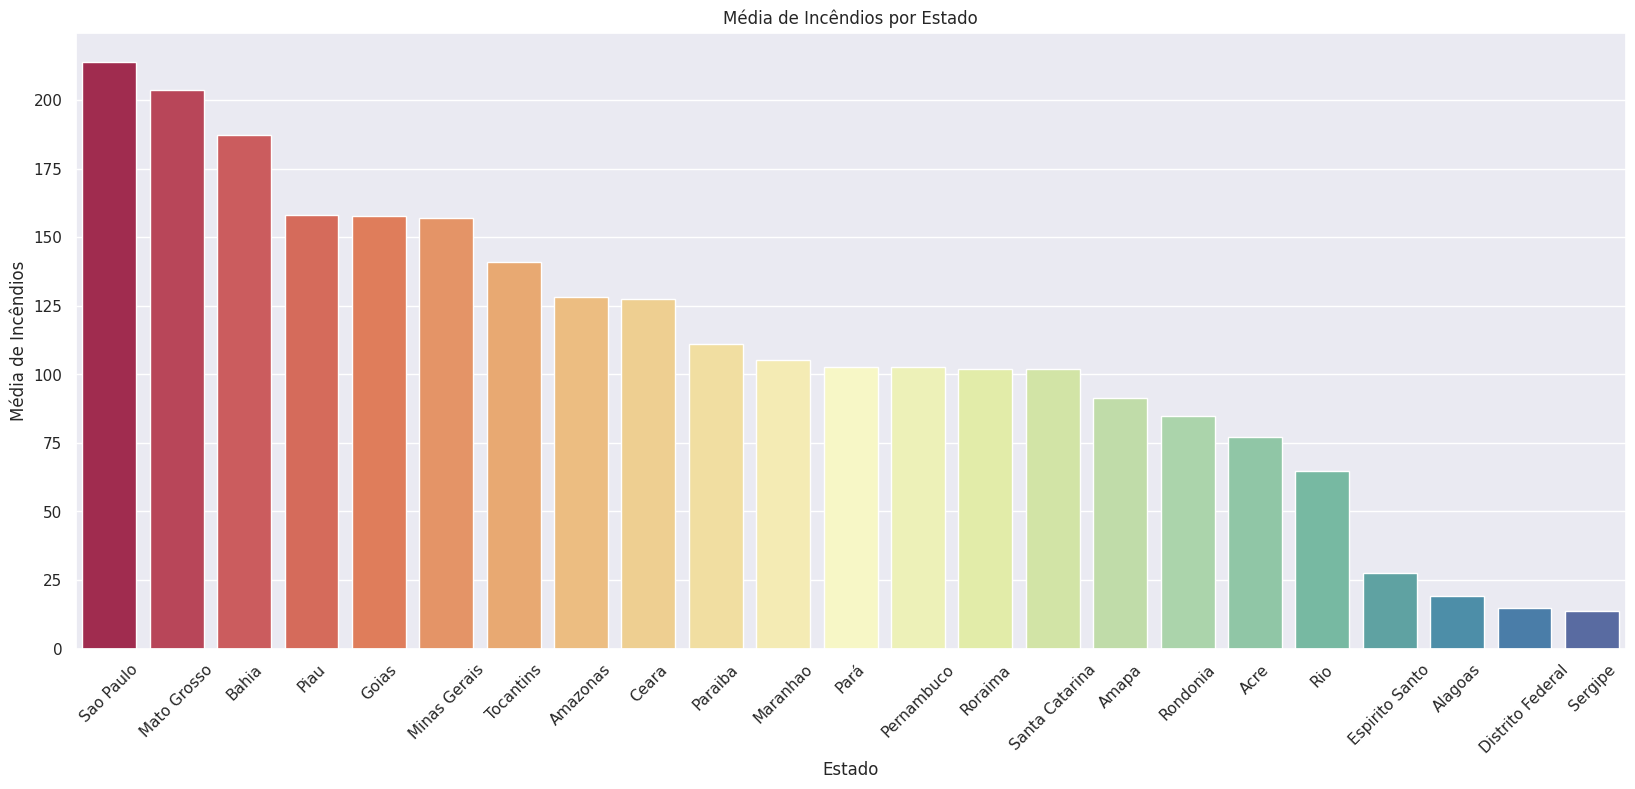

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
sns.barplot(x = 'state', y = 'number', data = media_incendios_estados, palette = 'Spectral')
plt.title('Média de Incêndios por Estado')
plt.xlabel('Estado')
plt.ylabel('Média de Incêndios')
plt.xticks(rotation=45)
plt.show()

* Avaliar a quantidade de incêndios no estado de Amazonas ao longo do tempo

In [ ]:
incendios_amazonas = incendios_df[incendios_df['state'] == 'Amazonas']
total_incendios_amazonas = incendios_amazonas.groupby('year')['number'].sum().reset_index()
print(total_incendios_amazonas)

    year    number
0   1998   946.000
1   1999  1061.000
2   2000   853.000
3   2001  1297.000
4   2002  2852.000
5   2003  1524.268
6   2004  2298.207
7   2005  1657.128
8   2006   997.640
9   2007   589.601
10  2008  2717.000
11  2009  1320.601
12  2010  2324.508
13  2011  1652.538
14  2012  1110.641
15  2013   905.217
16  2014  2385.909
17  2015  1189.994
18  2016  2060.972
19  2017   906.905


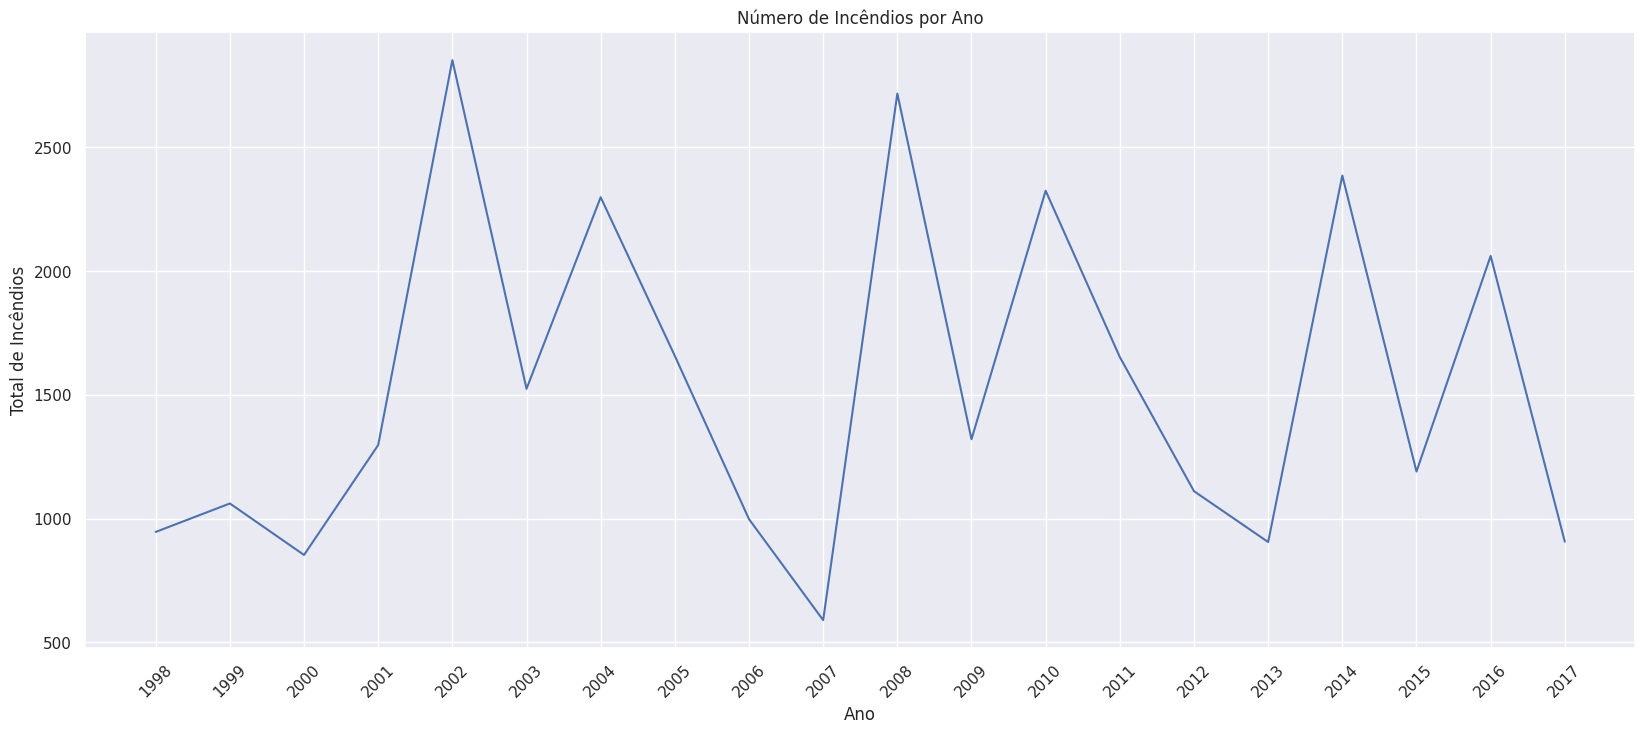

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,8))
sns.lineplot(x="year", y="number", data= total_incendios_amazonas)
plt.title('Número de Incêndios por Ano')
plt.xticks(total_incendios_amazonas['year'])
plt.xlabel('Ano')
plt.ylabel('Total de Incêndios')
plt.xticks(rotation=45)
plt.show()

* Total de incêndios reportados no ano de 2017

In [ ]:
incendios_2017 = incendios_df[incendios_df['year'] == 2017]
total_incendios_2017 = incendios_amazonas.groupby('month')['number'].sum().reset_index()
total_incendios_2017 = total_incendios_2017.sort_values(by = 'number', ascending = False)
print(total_incendios_2017)

        month    number
10    Outubro  7827.809
9    Novembro  5843.054
5       Julho  3809.112
11   Setembro  3710.180
1      Agosto  2900.974
2    Dezembro  2224.000
4     Janeiro  1531.000
3   Fevereiro  1047.000
8       Março   728.000
6       Junho   618.000
7        Maio   219.000
0       Abril   192.000


<ipython-input-70-692582a6b346>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'month', y = 'number', data = total_incendios_2017, palette = 'Spectral')


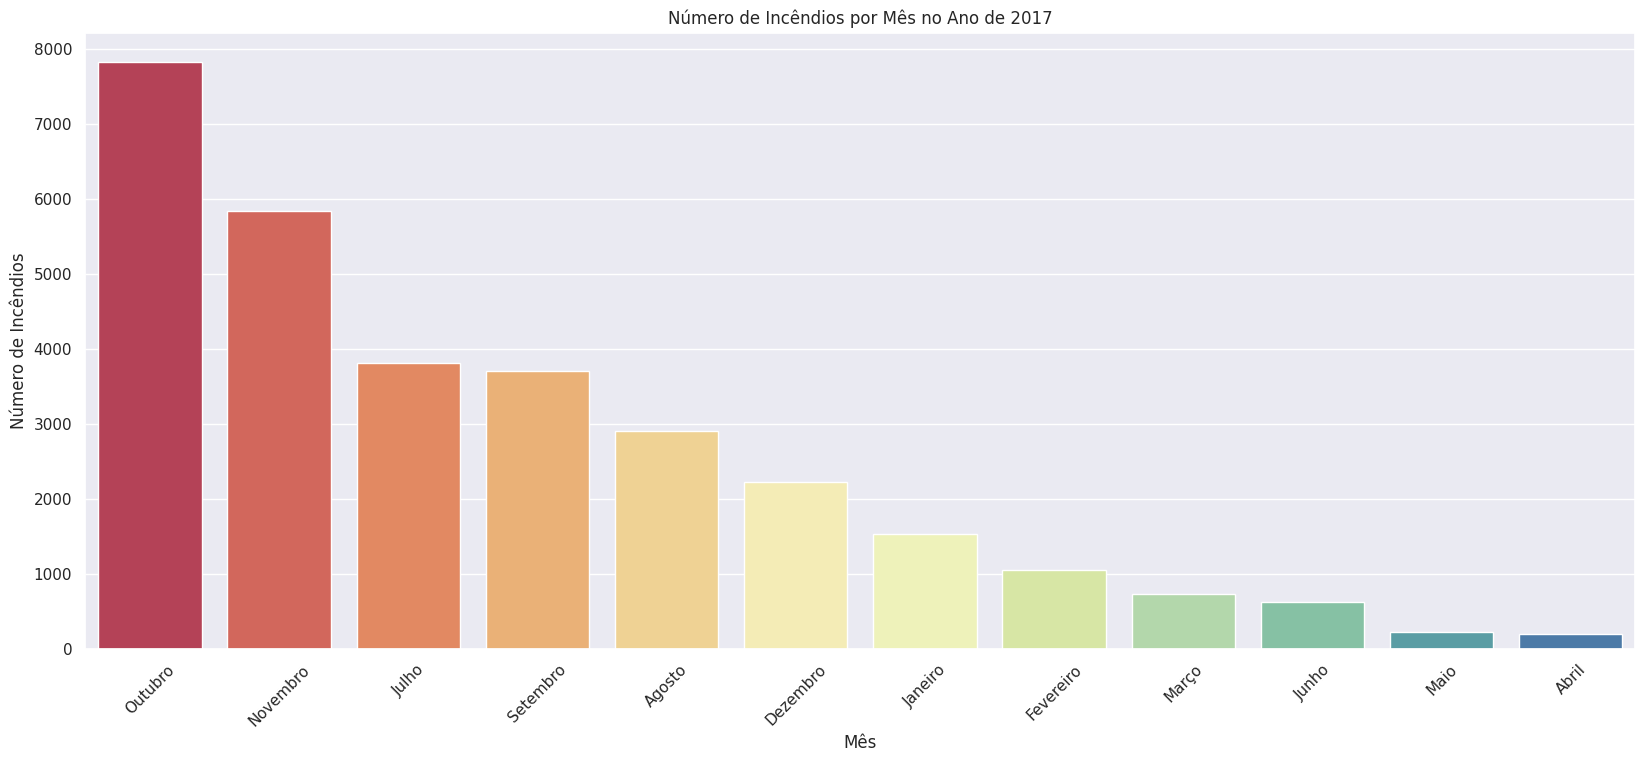

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
sns.barplot(x = 'month', y = 'number', data = total_incendios_2017, palette = 'Spectral')
plt.title('Número de Incêndios por Mês no Ano de 2017')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45)
plt.show()